In [394]:
import pandas as pd
import numpy as n
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

 Read the data from the CSV and manipulate the date column into datetime type. 
 Also, sort the values in ascending order of date.

In [395]:
df = pd.read_csv('goldprice.csv', thousands=',')
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
print(df.head())

        Date  Close   Open   High    Low    Vol.
0 1980-01-02  575.5  562.5  577.0  558.0   7.26K
1 1980-01-03  625.0  627.0  640.0  603.0  20.75K
2 1980-01-04  603.6  609.5  621.0  573.0   2.66K
3 1980-01-07  627.0  629.0  635.0  611.0   3.00K
4 1980-01-08  602.5  611.5  619.0  600.0   0.75K


Modify the Vol. column to accurately depict data contained. Convert all columns to numeric type

In [396]:
df['Vol.'] = df['Vol.'].str.replace('K','')
df['Vol.'] = pd.to_numeric(df['Vol.'],downcast='float').map(lambda x: x*1000).round(1)
pd.to_numeric(df['Close'])
pd.to_numeric(df['Open'])
pd.to_numeric(df['High'])
pd.to_numeric(df['Low'])

0        558.00
1        603.00
2        573.00
3        611.00
4        600.00
5        595.00
6        592.00
7        615.00
8        650.00
9        675.00
10       738.00
11       715.00
12       805.00
13       812.00
14       679.00
15       650.00
16       668.00
17       630.00
18       606.00
19       664.00
20       654.00
21       638.00
22       666.00
23       659.00
24       667.00
25       705.00
26       685.00
27       688.50
28       702.00
29       689.00
         ...   
9523    1330.60
9524    1326.70
9525    1324.50
9526    1319.50
9527    1323.00
9528    1308.10
9529    1308.70
9530    1299.50
9531    1291.20
9532    1294.10
9533    1291.70
9534    1295.00
9535    1284.10
9536    1280.40
9537    1278.20
9538    1272.00
9539    1271.00
9540    1273.10
9541    1268.50
9542    1262.80
9543    1277.70
9544    1284.60
9545    1286.80
9546    1291.80
9547    1292.90
9548    1292.50
9549    1283.20
9550    1278.60
9551    1277.60
9552    1281.66
Name: Low, dtype: float6

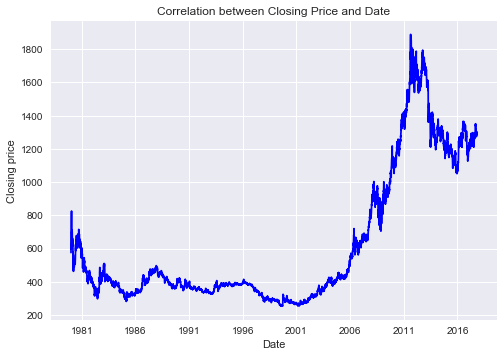

In [397]:
plt.plot(df['Date'], df['Close'], color = 'blue')
plt.title('Correlation between Closing Price and Date')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.show()

We don't see much correlation between Date and Closing Price. So, it becomes difficult to predict the Closing price based on the Date. Also, being event data, each row isn't independent of the other, which means they can't be treated that way. To acknowledge this type of sequential data, we create new features that would (hopefully) introduce a correlation between Date and the closing price. For instance, here we introduce a rolling average of the closing price over 5, 30 and 365 days

In [398]:
df['avg_5'] = df['Close'].rolling(window=5).mean().round(2).shift(1)
df['avg_30'] = df['Close'].rolling(window=30).mean().round(2).shift(1)
df['avg_365'] = df['Close'].rolling(window=365).mean().round(2).shift(1)

In [399]:
#Drop rows that have a value 'NaN' (created from calculating 365 day averages)
df = df[df["Date"] > datetime(year=1981, month=6, day=14)]
df.dropna(axis = 0, inplace = True)

In [ ]:
plt.plot(df['avg_5'], df['Close'], color = 'red', label='5 day avg')
plt.plot(df['avg_30'], df['Close'], color = 'green', label='30 day avg')
plt.plot(df['avg_365'], df['Close'], color = 'yellow', label='365 day avg')
plt.title('Correlation between Averages and Date')
plt.xlabel('Date')
plt.ylabel('Closing price Averages')
plt.legend(loc='lower center')
plt.show()

As expected, a linear correlation is created between Date and the avg closing price values. This should facilitate a Linear regression model to make predictions.

In [392]:
X = df[['avg_5','avg_30','avg_365']]
y = df['Close']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
#reg_all.fit(X_train, y_train)
#y_pred = reg_all.predict(X_test)
reg_all = LinearRegression()
cv_scores = cross_val_score(reg_all, X, y, cv=5)

In [393]:
#print("R^2: {}".format(reg_all.score(X_test, y_test)))
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#print("Root Mean Squared Error: {}".format(rmse))
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 0.97655462  0.96302946  0.99045163  0.99685184  0.98718722]
Average 5-Fold CV Score: 0.9828149517577481


The Linear regression model has an accuracy of 98% which is pretty high! As a baseline model we can stop here, but this is 
nowhere near the end of it. We'll need to dive further into whether this model would work on unseen data, and be able to produce 
accurate results. We may need to add/modify some features along the way, finding new correlations between them and applying
feature selection to the features that really matter.

References : Previous projects, classes, courses taken on Datacamp
Dataset from : https://www.investing.com/commodities/gold